In [1]:
# Submission for Team AI Penguins
# Astrazeneca AI Challenge (Shaastra 2021)
# Note: This code is a more concise version, with the focus on giving output

In [2]:
# Importing Required Libraries
from PIL import Image
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pytesseract
import re
pytesseract.pytesseract.tesseract_cmd = 'C:/Users/Primary/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'

In [3]:
# Choosing the Image File to Import

#file = "Image 1-1.png"
#file = "Image 2-1.jpg"
#file = "Image 2-3.jpg"
#file = "Image 2-4.jpg"
file = "Image 4-2.png"
#file = "Image 5-1.png"
#file = "Image 5-3.png"
#file = "Image 5-9.png"

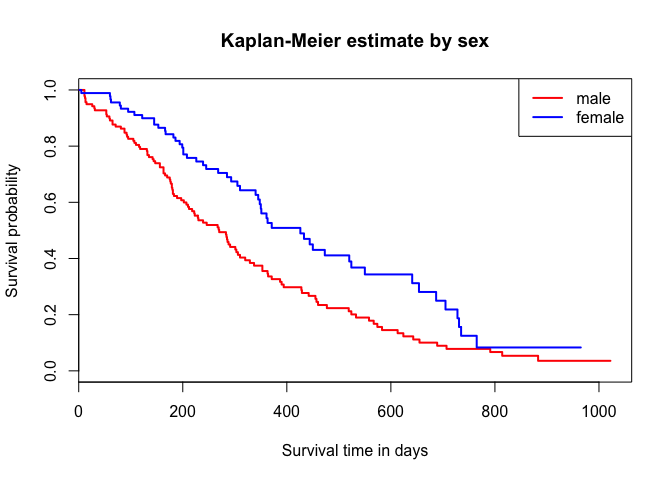

In [4]:
# Loading the image file for manipulation of the same
img = Image.open(file)
width, height = img.size
colourPixels = img.convert("RGB")
colourArray = np.array(colourPixels.getdata())
display(img)

In [5]:
# There are 255x255x255 colour values possible. These are reduced to 6x6x6 values (when bins=6)
# Frequency Distribution of this is obtained
bins = 6
data = []
frequency = [0]*1000
for i in range(width):
    row = []
    for j in range(height):
        n = j*width + i
        val = 100*round(bins*colourArray[n][0]/255.0) + 10*round(bins*colourArray[n][1]/255.0) + round(bins*colourArray[n][2]/255.0)
        row.append(val)
        frequency[val] = frequency[val] + 1
    data.append(row)
    
# Main Colour groups are identified from frequency distribution.
n = len(frequency)
peaks = []
for r in range(1000):
    f = frequency[r]
    a = int(r/100)
    b = int((r%100)/10)
    c = r%10
    flag = True
    for i in range((0 if (a==0) else (a-1)),(10 if (a==9) else (a+2))):
        for j in range((0 if (b==0) else (b-1)),(10 if (b==9) else (b+2))):
            for k in range((0 if (c==0) else (c-1)),(10 if (c==9) else (c+2))):
                if(frequency[i*100+j*10+k]>f):
                    flag = False
    if((flag) and frequency[r]>0):
        peaks.append(r)

# Eucledian colour distance between two pixels
def dist(p1,p2):
    (a,b,c) = (int(p1/100),int((p1%100)/10),int(p1%10))
    (i,j,k) = (int(p2/100),int((p2%100)/10),int(p2%10))
    d = math.sqrt((a-i)**2+(b-j)**2+(c-k)**2)
    return d

# All pixels reassigned to one of the above colour groups
for i in range(width):
    for j in range(height):
        px1 = data[i][j]
        min_dist = dist(px1,peaks[0])
        data[i][j] = peaks[0]
        for px in peaks:
            distance = dist(px1,px)
            if(min_dist>distance):
                min_dist = distance
                data[i][j] = px

In [6]:
# Constants for background and axis

# Assuming White Background
background = bins*100+bins*10+bins
# Assume Black Axis
axis_colour = min(peaks)

# Locating y axis in the image
y_axis=-1
i=round(width/2)
flag=1
while (i>=0) and (flag==1):
    j=0
    while (j<height) and (flag==1):
        val = data[i][j]
        if(val==axis_colour):
            length=0
            while(data[i][j]==val) and (j<height) and (flag==1):
                length=length+1
                j=j+1
                if(length>height/2):
                    y_axis=i
                    flag=0
        j=j+1
        
    i=i-1
    
# Locating x axis in the image
x_axis=-1
j=round(height/2)
flag=1
while (j<height) and (flag==1):
    i=0
    while (i<width) and (flag==1):
        val = data[i][j]
        if(val==axis_colour):
            length=0
            while(data[i][j]==val) and (i<width) and (flag==1):
                length=length+1
                i=i+1
                if(length>height/2):
                    x_axis=j
                    flag=0
        i=i+1
        
    j=j+1
    
# Marking the Intersection of axis (this may or many not be origin)
intersection = (y_axis, x_axis)
data[y_axis][x_axis] = axis_colour

# Finding the length of the axis
i = y_axis
while((data[i][x_axis]==axis_colour) and (i<width)):
    i=i+1
x_ini = y_axis
x_lim = i-1

j = x_axis
while((data[y_axis][j]==axis_colour) and (j>=0)):
    j=j-1
y_ini = x_axis
y_lim = j-1

In [7]:
# Locating all value marking divisions on x axis
j = x_axis
flag = True
while(j<height and flag):
    for i in range(x_ini, x_lim+1):
        if (data[i][j]==background):
            flag = False
    j=j+1

flag = True
while(j<height and flag):
    flag = False
    for i in range(x_ini, x_lim+1):
        if not(data[i][j]==background):
            flag = True
    j=j+1
j=j-4

x_locs = []
i = x_ini
while(i<=x_lim):
    if not(data[i][j]==background):
        x_locs.append(i)
        while not(data[i][j]==background) and (i<=x_lim):
            i=i+1
    i=i+1
    
# Locating all value marking divisions on y axis
i = y_axis
flag = True
while(i>=0 and flag):
    for j in range(y_lim, y_ini+1):
        if (data[i][j]==background):
            flag = False
    i=i-1
i=i-2

flag = True
while(i>=0 and flag):
    flag = False
    for j in range(y_lim, y_ini+1):
        if not (data[i][j]==background):
            flag = True
    i=i-1
i=i+4

y_locs = []
j = y_lim
while(j<=y_ini):
    if not(data[i][j]==background):
        y_locs.append(j)
        while not(data[i][j]==background) and (j<=y_ini):
            j=j+1
    j=j+1

In [8]:
# Finding x Scale in pixel space
xwidth_px = (x_locs[-1]-x_locs[0])/(len(x_locs)-1)

# Finding y Scale in pixel space
ywidth_px = (y_locs[-1]-y_locs[0])/(len(y_locs)-1)

In [9]:
# Finding location of the readings (values) text along the x axis
band = ywidth_px*0.15

j = x_axis
flag = True
while(j<=height and flag):
    flag = False
    for i in range(x_ini, x_lim+1):
        if not(data[i][j]==background):
            flag = True
    j=j+1

flag = True
while(j<=height and flag):
    for i in range(x_ini, x_lim+1):
        if not(data[i][j]==background):
            flag = False
    j=j+1
xchar_low = j-1

dist=0
while (dist<5 and j<=height):
    flag = True
    while(j<=height and flag):
        flag = False
        for i in range(x_ini, x_lim+1):
            if not(data[i][j]==background):
                flag = True
        j=j+1
    xchar_high = j-1
    
    dist = 0
    flag = True
    while(j<=height and flag):
        for i in range(x_ini, x_lim+1):
            if not(data[i][j]==background):
                flag = False
        j=j+1
        dist = dist+1
        
# Finding location of the readings (values) text along the y axis
band = xwidth_px*0.15

i = y_axis
flag = True
while(i>=0 and flag):
    flag = False
    for j in range(y_lim, y_ini+1):
        if not(data[i][j]==background):
            flag = True
    i=i-1

flag = True
while(i>=0 and flag):
    for j in range(y_lim, y_ini+1):
        if not(data[i][j]==background):
            flag = False
    i=i-1
ychar_right = i+1

dist = 0
while((dist<5) and (i>=0)):
    flag = True
    while((i>=0) and (flag)):
        flag = False
        for j in range(y_lim, y_ini+1):
            if not(data[i][j]==background):
                flag = True
        i=i-1
    ychar_left = i+1

    dist=0
    flag = True
    while((i>=0) and (flag)):
        for j in range(y_lim, y_ini+1):
            if not(data[i][j]==background):
                flag = False
        i=i-1
        dist = dist+1

In [10]:
# Isolating each individual textual value along x axis
band = int(xwidth_px*0.3)
x_range = {}
x_min = x_locs[0]
x_max = x_locs[0]
for x in x_locs:
    i=x-band
    flag=True
    while((i<(x+band+1)) and flag):
        for j in range(xchar_low, xchar_high+1):
            if not(data[i][j]==background):
                flag=False
        i=i+1
    a=i-1
    b=i

    dist=0
    while((i<(x+band+1))and(dist<8)):
        flag=True
        while((i<(x+band+1)) and flag):
            flag = False
            for j in range(xchar_low, xchar_high+1):
                if not(data[i][j]==background):
                    flag=True
                    b=i
            i=i+1
            

        dist=0
        flag=True
        while((i<(x+band+1)) and flag):
            for j in range(xchar_low, xchar_high+1):
                if not(data[i][j]==background):
                    flag=False
            i=i+1
            dist=dist+1         
    x_range[x] = (a,b)
    x_min = a if (a<x_min) else x_min
    x_max = b if (b>x_max) else x_max
    
# Isolating each individual textual value along y axis
band = int(ywidth_px*0.3)
y_range = {}
y_min = y_locs[0]
y_max = y_locs[0]
for y in y_locs:
    j=y-band
    flag=True
    while((j<(y+band+1)) and flag):
        for i in range(ychar_left, ychar_right+1):
            if not(data[i][j]==background):
                flag=False
        j=j+1
    a=j-1
    b=j

    dist=0
    while((j<(y+band+1))and(dist<8)):
        flag=True
        while((j<(y+band+1)) and flag):
            flag = False
            for i in range(ychar_left, ychar_right+1):
                if not(data[i][j]==background):
                    flag=True
                    b=j+1
            j=j+1
            

        dist=0
        flag=True
        while((j<(y+band+1)) and flag):
            for i in range(ychar_left, ychar_right+1):
                if not(data[i][j]==background):
                    flag=False
            j=j+1
            dist=dist+1         
    y_range[y] = (a,b)
    y_min = a if (a<y_min) else y_min
    y_max = b if (b>y_max) else y_max
    
"""
# Saving each isolated text as a separate image
images = {}
k=1
for val, (loc1,loc2) in x_range.items():
    cropped_img = img.crop((loc1,xchar_low,loc2+1,xchar_high))
    images[val]=cropped_img
    resized_img = cropped_img.resize((7,10))
    resized_img.save((str(k)+".png"))
    k=k+12
"""

'\n# Saving each isolated text as a separate image\nimages = {}\nk=1\nfor val, (loc1,loc2) in x_range.items():\n    cropped_img = img.crop((loc1,xchar_low,loc2+1,xchar_high))\n    images[val]=cropped_img\n    resized_img = cropped_img.resize((7,10))\n    resized_img.save((str(k)+".png"))\n    k=k+12\n'

In [11]:
# The entire x axis text sub-image, as well as the interpreted text
x_img = img.crop((x_min-10,xchar_low-2,x_max+10,xchar_high+2))

# Estimating the x axis actual value scale
a = pytesseract.image_to_string(x_img,config='--psm 6')
a = re.split(" ",a)
numbers = []
for i,ele in enumerate(a):
    if(ele.replace('.', '', 1).isdigit()):
         numbers.append((i,float(ele)))

scales = []
sets = []
for i in range(len(numbers)):
    for j in range(i):
        if((numbers[i][1]-numbers[j][1])>0):
            scales.append(round((numbers[i][1]-numbers[j][1])/((numbers[i][0]-numbers[j][0])),2))
            sets.append((x_locs[numbers[i][0]],numbers[i][1]))

if not (len(scales)==0):
    xwidth = max(set(scales), key=scales.count)
    i = scales.index(xwidth)
    x_px = sets[i][0]
    x_val = sets[i][1]
else:
    xwidth = 3
    x_px = x_locs[0]
    x_val = 0

# The entire y axis text sub-image, as well as the interpreted text
y_img1 = img.crop((ychar_left-2,y_min,ychar_right+2,y_max))

count1 = 0
b1 = pytesseract.image_to_string(y_img1,config='--psm 6')
b1 = re.split("\n",b1)
for i,ele in enumerate(b1):
    if(ele.replace('.', '', 1).isdigit()):
         count1 = count1 + 1
            
# The entire y axis text sub-image (ROTATED), as well as the interpreted text
y_img2 = y_img1.transpose(Image.ROTATE_270)
count2 = 0
b2 = pytesseract.image_to_string(y_img2,config='--psm 6')
b2 = re.split(" ",b2)
for i,ele in enumerate(b2):
    if(ele.replace('.', '', 1).isdigit()):
         count2 = count2 + 1
            
# Estimating the y axis actual value scale by choosing the approriate rotation
flag = True
if(count1>=count2):
    y_img = y_img1
    b = b1
    flag = False
else:
    y_img = y_img2
    b = b2
    flag = True
    
n=len(y_locs)
numbers = []
for i,ele in enumerate(b):
    if(ele.replace('.', '', 1).isdigit()):
        if(flag):
            numbers.append((n-i-1,float(ele)))
        else:
            numbers.append((i,float(ele)))
            
scales = []
sets = []
for i in range(len(numbers)):
    for j in range(i):
        if(((numbers[j][1]-numbers[i][1])/((numbers[i][0]-numbers[j][0])))>0):
            scales.append(round((numbers[j][1]-numbers[i][1])/((numbers[i][0]-numbers[j][0])),2))
            sets.append((y_locs[numbers[j][0]],numbers[j][1]))

if not (len(scales)==0):
    ywidth = max(set(scales), key=scales.count)
    i = scales.index(ywidth)
    y_px = sets[i][0]
    y_val = sets[i][1]
else:
    ywidth = 10
    y_px = y_locs[-1]
    y_val = 0

In [12]:
# Marking the origin in pixel space
x_origin = round(x_px-(x_val-0)*(xwidth_px/xwidth))
y_origin = round(y_px+(y_val-0)*(ywidth_px/ywidth))
origin = (x_origin, y_origin)

# Tranforming Actual Coordinate Space to Pixel Space
def actual_to_px(a,b):
    x = round(x_origin + (a-0)*(xwidth_px/xwidth))
    y = round(y_origin - (b-0)*(ywidth_px/ywidth))
    return (x,y)

# Transforming pixel space to actual coordinate space
def px_to_actual(x,y):
    a = 0 + (x-x_origin)*(xwidth/xwidth_px)
    b = 0 + (y_origin-y)*(ywidth/ywidth_px)
    return (a,b)

In [13]:
# Finding all unique line colours in the graph
values = []
x_vals = [int(width/2),int(width/3),int(width/4),int(2*width/3),int(3*width/5)]
for x in x_vals:
    for j in range(height):
        val = data[x][j]
        if not(val==background or val==axis_colour):
            if(val not in values):
                values.append(val)
                
# Declaring Required Variables
locations = []
pointer = {}
counter = {}
for i, val in enumerate(values):
    pointer[val]=i
    counter[val]=0
    locations.append([])

# Tracking the Curves on the graph in Pixel space by colour, and storing all the pixel coordinates
for m,val in enumerate(pointer):
    flag2 = True
    i = y_axis
    
    while(flag2):
        loc = []
        count = 0
        j=y_lim
        flag = True
        queue = []
        
        while(i<x_lim and flag):
            j=y_lim
            while((j<x_axis-2) and flag):
                if(val == data[i][j]):
                    flag=False
                    queue.append((i,j))
                j=j+1
            i=i+1

        while(queue):
            (a,b) = queue.pop(0)
            if ((a<x_lim) and (b>0) and (b<x_axis)):
                if(data[a][b]==val):
                    elements = [(a+p,b+q) for p in range(10) for q in range(10)]
                    elements.remove((a,b))
                    for ele in elements:
                        if ele not in queue:
                            queue.append(ele)
                    loc.append((a,b))
                    count = count+1
                    i = a
        i=i+1
        if((count>width/2.0) or (i>=width)):
            flag2 = False
            locations[m] = loc
            counter[val] = count
            
# Removing bad curves (which are not curves, but other garbage that might have been recorded)
bad_loc = []
for loc in locations:
    if(len(loc)<width/2.0):
        bad_loc.append(loc)
    elif((y_axis+5,x_axis) in loc):
        bad_loc.append(loc)

for loc in bad_loc:
    locations.remove(loc)

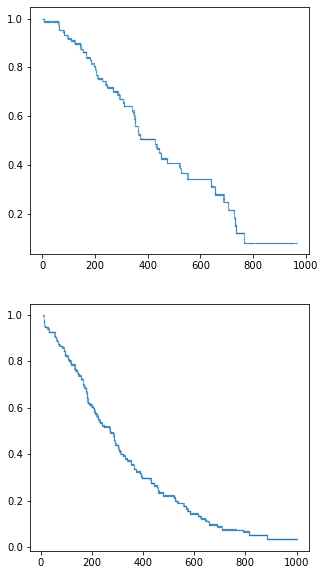

In [14]:
# Converting pixel coordinates to actual coordinate space, saving in csv, and plotting in matplotlib to verify
f, axs = plt.subplots(len(locations),1,figsize=(5,5*len(locations)))
for i, loc in enumerate(locations):
    coordinates = []
    for j, val in enumerate(loc):
        coordinates.append(px_to_actual(val[0],val[1]))
    df = pd.DataFrame(coordinates, columns=["x","y"])
    df.to_csv(("Curve_"+str(i+1)+".csv"),index=False)
    plt.subplot(len(locations), 1, i+1)
    plt.scatter(df.x, df.y,s=0.05)